<center> <a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03-Deep-Learning/notebooks/10-SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> </center>

#<h1>SOM: Self-Organizing Map</h1>

En esta notebook se ilustra brevemente el funcionamiento y algunos usos de las SOMs. Para esto, usaremos el módulo `minisom`.

Para entrenar redes SOM usando este módulo no es necesario, usualmente, tener GPU.

[Documentación](https://github.com/JustGlowing/minisom)

<img align="left" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/03-Deep-Learning/img/SOM-training-2.png?raw=1"/>

In [1]:
!pip install -q minisom

  Preparing metadata (setup.py) ... done


Referencias:

* Berglund, E., & Sitte, J. (2006). The parameterless self-organizing map algorithm. IEEE Transactions on neural networks, 17(2), 305-316.
* Yin, H. (2008). The self-organizing maps: Background, theories, extensions and applications. In Studies in Computational Intelligence. Stud. Comput. Intell. (Vol. 115, pp. 715-762). Springer Nature. https://doi.org/10.1007/978-3-540-78293-3_17

# Ejemplo 1: Demostración básica

En este ejemplo analizaremos datos de tarjetas de crédito de direferentes clientes, los datos están divididos en dos clases. En este ejemplo ilustraremos el funcionamiento de una SOM.

Traemos el dataset desde Github

In [2]:
url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03-Deep-Learning/data/Credit_Card_Applications.csv"
!wget --no-cache --backups=1 --progress="dot" {url}

--2023-07-14 01:48:57--  https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03-Deep-Learning/data/Credit_Card_Applications.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34951 (34K) [text/plain]
Failed to rename Credit_Card_Applications.csv to Credit_Card_Applications.csv.1: (2) No such file or directory
Saving to: ‘Credit_Card_Applications.csv’

     0K .......... .......... .......... ....                 100% 42.7M=0.001s

2023-07-14 01:48:57 (42.7 MB/s) - ‘Credit_Card_Applications.csv’ saved [34951/34951]



In [3]:
import pandas as pd

df = pd.read_csv('Credit_Card_Applications.csv')
df

CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A13   A14  Class  
0    100  1213      0  
1    160     1      0  
2    280     1      0  
3      0     1      1  
4     60   159      1  
..   ...   ...    ...  
685    0     1      1  
686    0    45      0  
687  100     1      1  
688  120    12      1  
689  560     1      1  

[690 rows x 16 columns]

Separamos en el conjunto de datos y el vector de etiquetas. Las features son las columnas `A1, ... , A14` y la clase de cada instancia es la última columna.

In [4]:
X = df.values[:,1:14]
y = df.values[:, -1]

print(f"Forma de los datos {X.shape}")

y = y.astype(int)

Forma de los datos (690, 13)


Veamos los rangos de valores de cada atributo

In [ ]:
df.describe()

CustomerID          A1          A2          A3          A4  \
count  6.900000e+02  690.000000  690.000000  690.000000  690.000000   
mean   1.569047e+07    0.678261   31.568203    4.758725    1.766667   
std    7.150647e+04    0.467482   11.853273    4.978163    0.430063   
min    1.556571e+07    0.000000   13.750000    0.000000    1.000000   
25%    1.563169e+07    0.000000   22.670000    1.000000    2.000000   
50%    1.569016e+07    1.000000   28.625000    2.750000    2.000000   
75%    1.575190e+07    1.000000   37.707500    7.207500    2.000000   
max    1.581544e+07    1.000000   80.250000   28.000000    3.000000   

               A5          A6          A7          A8          A9        A10  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.00000   
mean     7.372464    4.692754    2.223406    0.523188    0.427536    2.40000   
std      3.683265    1.992316    3.346513    0.499824    0.495080    4.86294   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.00000   
25%      4.000000    4.000000    0.165000    0.000000    0.000000    0.00000   
50%      8.000000    4.000000    1.000000    1.000000    0.000000    0.00000   
75%     10.000000    5.000000    2.625000    1.000000    1.000000    3.00000   
max     14.000000    9.000000   28.500000    1.000000    1.000000   67.00000   

              A11         A12          A13            A14       Class  
count  690.000000  690.000000   690.000000     690.000000  690.000000  
mean     0.457971    1.928986   184.014493    1018.385507    0.444928  
std      0.498592    0.298813   172.159274    5210.102598    0.497318  
min      0.000000    1.000000     0.000000       1.000000    0.000000  
25%      0.000000    2.000000    80.000000       1.000000    0.000000  
50%      0.000000    2.000000   160.000000       6.000000    0.000000  
75%      1.000000    2.000000   272.000000     396.500000    1.000000  
max      1.000000    3.000000  2000.000000  100001.000000    1.000000

Re-escalamos cada columna para que los valores estén en $[0,1]$.

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [6]:
pd.DataFrame(X).describe()

0           1           2           3           4           5   \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261    0.267943    0.169954    0.383333    0.490190    0.461594   
std      0.467482    0.178245    0.177792    0.215031    0.283328    0.249040   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.134135    0.035714    0.500000    0.230769    0.375000   
50%      1.000000    0.223684    0.098214    0.500000    0.538462    0.375000   
75%      1.000000    0.360263    0.257411    0.500000    0.692308    0.500000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.078014    0.523188    0.427536    0.035821    0.457971    0.464493   
std      0.117422    0.499824    0.495080    0.072581    0.498592    0.149407   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.005789    0.000000    0.000000    0.000000    0.000000    0.500000   
50%      0.035088    1.000000    0.000000    0.000000    0.000000    0.500000   
75%      0.092105    1.000000    1.000000    0.044776    1.000000    0.500000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               12  
count  690.000000  
mean     0.092007  
std      0.086080  
min      0.000000  
25%      0.040000  
50%      0.080000  
75%      0.136000  
max      1.000000

Definimos los parámetros del SOM

In [7]:
som_grid_rows = 20
som_grid_columns = 20
iterations = 20000
sigma = 1 # Alcance del efecto de actualización a los vecinos, mientras más neuronas, mayor es sigma
learning_rate = 0.5

Definimos el SOM

In [8]:
from minisom import MiniSom

som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=X.shape[1], sigma=sigma,
              learning_rate=learning_rate)

# Inicializamos los pesos aleatoriamente
som.random_weights_init(X)

Entrenamos la red

In [9]:
som.train_random(X, iterations)

Veamos la matriz de pesos. Observar que es un vector, de tantas componentes como features de entrada, por cada una de las 20$\times$20 neuronas

In [10]:
pesos = som.get_weights()
print(pesos.shape)

(20, 20, 13)


Por ejemplo, la neurona $(2,3)$ tiene como vector de pesos:

In [12]:
pesos[2,3,:]

array([4.53720733e-01, 2.42045511e-01, 1.09408599e-01, 4.97500551e-01,
       6.42285208e-01, 6.37322029e-01, 5.90407391e-02, 5.46279183e-01,
       5.48732272e-01, 1.29428920e-02, 1.86006949e-08, 3.71982978e-01,
       1.74806056e-01])

El mapa de distancias indica, en promedio, la distancia de cada celda con sus vecinos. Es una matriz de rows$\times$columns.

In [11]:
dm = som.distance_map()
dm.shape

(20, 20)

Recordar que el grid de neuronas se *estira y afloja* para cubrir los datos, reflejando la topología de los datos. Por lo tanto, la distancia promedio entre cada celda no es la misma.

<img align="left" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/03-Deep-Learning/img/TrainSOM.gif?raw=1"/>

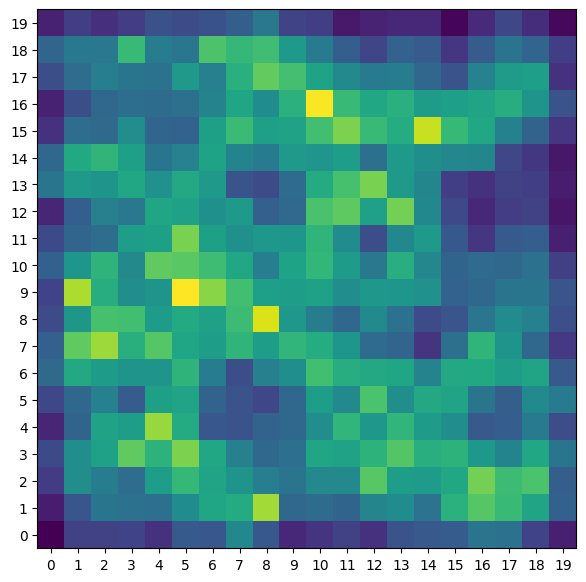

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(som.distance_map().T,origin='lower')
plt.xticks(range(som_grid_rows))
plt.yticks(list(range(som_grid_columns)))
plt.show()

Para cada dato $x_j$, podemos obtener la neurona ganadora de la siguiente forma:

In [14]:
som.winner(X[0])

(3, 15)

También podemos visualizar la asignación explícita de cada punto en su respectiva celda. Observar que puede haber celdas vacías o celdas con varios puntos.

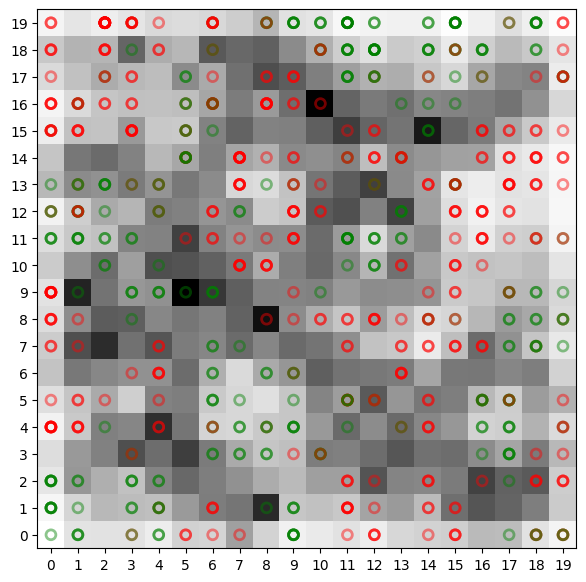

In [18]:
colors = ['r', 'g'] # Colores para las etiquetas

plt.figure(figsize=(7,7))
for i, x in enumerate(X):
    w = som.winner(x)
    plt.scatter(w[0],
        w[1],
        marker = 'o',
        edgecolors = colors[y[i]],
        facecolors = 'None',
        s = 50,
        linewidths = 2,
        alpha=0.45)
plt.imshow(som.distance_map().T,origin='lower',cmap='Greys')
plt.xticks(range(som_grid_rows))
plt.yticks(list(range(som_grid_columns)))
plt.show()

# Ejemplo 2: Clasificación

En este ejemplo usaremos una SOM para la tarea de clasificar el dataset Iris.

In [19]:
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()

X = data.data   # Matriz de features
y = data.target # Vector de etiquetas

print(f"Número de ejemplos: {X.shape[0]}")
print(f"Número de features por ejemplo: {X.shape[1]}")

Número de ejemplos: 150
Número de features por ejemplo: 4


Probemos otra manera de re-escalar (**no es exclusiva de las redes SOM**):

Normalizamos de manera que cada vector 4-dimensional representando cada instancia tenga norma 1. Recordar que la norma de un vector $v=(v_1,...,v_D)$ es

$$|v|=\sqrt{v_1^2+...+v_D^2}$$

Podríamos intentar otras técnicas de normalización o re-escalamiento.

In [20]:
import pandas as pd

display(pd.DataFrame(X).head(3))

X_norm = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, X)

display(pd.DataFrame(X_norm).head(3))

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2

0         1         2         3
0  0.803773  0.551609  0.220644  0.031521
1  0.828133  0.507020  0.236609  0.033801
2  0.805333  0.548312  0.222752  0.034269

Dividimos los datos en entrenamiento y prueba

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=22,
                                                    train_size=0.85)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 127
Test size: 23


Definimos el SOM y entrenamos

In [22]:
from minisom import MiniSom

som_grid_rows = 7
som_grid_columns = 7

som = MiniSom(som_grid_rows, som_grid_columns, 4, sigma=3, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)

som.pca_weights_init(X_train) # Inicializamos los pesos con PCA

# ---- Realizamos el entrenamiento ----
n_iterations = 500
som.train_random(X_train, n_iterations, verbose=False)

Visualicemos las representaciones. La posición dentro de cada celda no tiene ningún significado

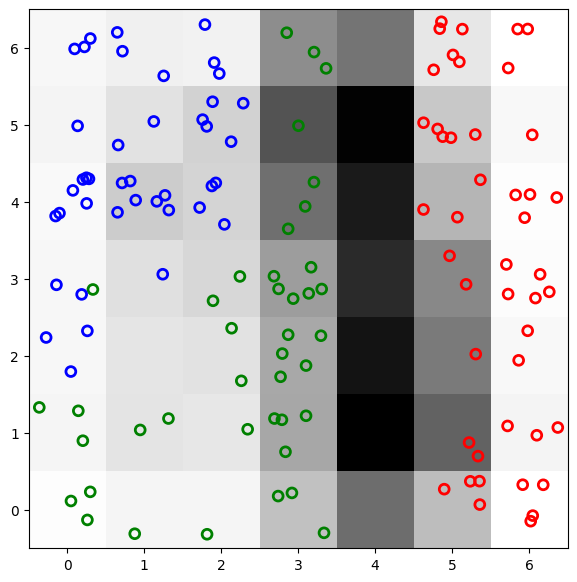

In [23]:
import matplotlib.pyplot as plt

offset = lambda x: x + 0.75*(-0.5+np.random.rand())  # función para desplazar aleatoriamente un punto dentro de la celda

colors = ['r','g','b']

plt.figure(figsize=(7,7))
for i, x in enumerate(X_train):
    w = som.winner(x)
    plt.scatter(offset(w[0]),
        offset(w[1]),
        marker = 'o',
        edgecolors = colors[y_train[i]],
        facecolors = 'None',
        s = 50,
        linewidths = 2)
plt.imshow(som.distance_map().T,origin='lower',cmap='Greys')
plt.xticks(range(som_grid_rows))
plt.yticks(list(range(som_grid_columns)))
plt.show()

El diccionario `labels_map` contiene los conteos de clase en cada celda.

In [24]:
som.labels_map(X_train,y_train)

defaultdict(list,
            {(3, 1): Counter({1: 4}),
             (0, 4): Counter({2: 7}),
             (6, 3): Counter({0: 5}),
             (2, 6): Counter({2: 3}),
             (2, 4): Counter({2: 4}),
             (1, 3): Counter({2: 1}),
             (5, 5): Counter({0: 5}),
             (6, 6): Counter({0: 3}),
             (2, 2): Counter({1: 2}),
             (1, 1): Counter({1: 2}),
             (5, 4): Counter({0: 3}),
             (6, 4): Counter({0: 4}),
             (6, 0): Counter({0: 4}),
             (2, 5): Counter({2: 5}),
             (0, 6): Counter({2: 3}),
             (3, 2): Counter({1: 5}),
             (0, 0): Counter({1: 3}),
             (5, 1): Counter({0: 2}),
             (3, 5): Counter({1: 1}),
             (3, 4): Counter({1: 3}),
             (3, 3): Counter({1: 6}),
             (5, 6): Counter({0: 6}),
             (5, 2): Counter({0: 1}),
             (6, 1): Counter({0: 3}),
             (1, 6): Counter({2: 3}),
             (3, 6): Counter({1:

Definimos una función que clasifique los datos con base en su representación dada por la SOM. Para esto, obtenemos los conteos de clase en cada celda para `X_train` y `y_train`. Definimos una clase default, calculando qué clase tiene más representantes, considerando todas las celdas.

A continuación, para cada dato que queremos predecir su etiqueta usando el SOM consideramos la celda ganadora BMU correspondiente y

1. Le asignamos la clase mayoritaria de la celda para `X_train` y `y_train` (ver figura) si la celda contenia datos de `X_train`.
2. Le asignamos la clase default si la celda no contenia datos de `X_train`.

In [25]:
def clasificar(som, data, winmap):
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:  # Si cae en una celda que contiene datos de entrenamiento
            result.append(winmap[win_position].most_common()[0][0]) # asignamos la clase mayoritaria en la celda
        else: # Si no
            result.append(default_class) # asignamos la clase default
    return result

Realizamos y evaluamos la tarea de clasificación.

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

winmap = som.labels_map(X_train, y_train)
predictions = clasificar(som, X_test, winmap)

print(len(predictions),y_test.shape)

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions,average='macro')}")
print(f"Precision: {precision_score(y_test, predictions,average='macro')}")
print(confusion_matrix(y_test, predictions))

23 (23,)
Accuracy: 0.9565217391304348
Recall: 0.9629629629629629
Precision: 0.9444444444444445
[[5 0 0]
 [0 9 0]
 [1 0 8]]


➖ Aquí podemos ver los detalles de cómo es la clase default

In [31]:
# np.sum(list(winmap.values())).most_common()

[(0, 45), (1, 41), (2, 41)]

Calculamos una matriz que tenga la clase mayoritaría de cada celda.

In [32]:
winmap = som.labels_map(X_train,y_train)

classes_cells = np.zeros_like(som.distance_map()) # La inicializamos en 0 porque la clase mayoritaria global es 0
for pair in winmap.keys():
    classes_cells[pair[0],pair[1]] = winmap[pair].most_common()[0][0]

classes_cells

array([[1., 1., 2., 2., 2., 2., 2.],
       [1., 1., 0., 2., 2., 2., 2.],
       [1., 1., 1., 1., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

Visualicemos las predicciones contra las etiquetas reales

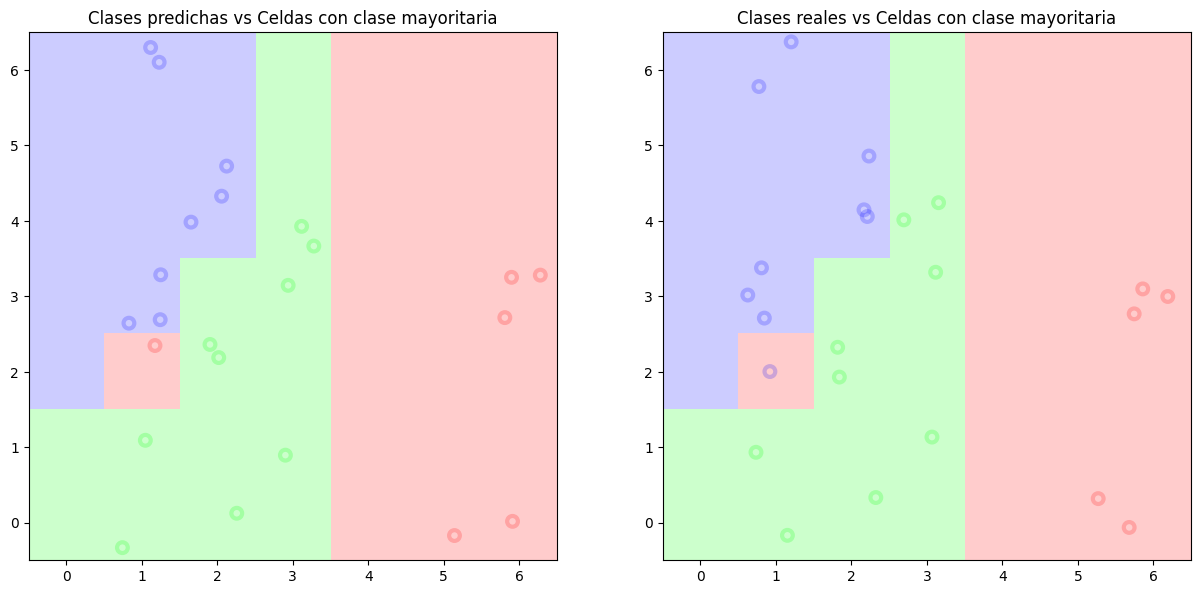

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ---- Función para distribuir los puntos dentro de la celda ----
offset = lambda x: x + 0.75*(-0.5+np.random.rand())

alpha = 0.2
colors = [(1,0,0,alpha),
          (0,1,0,alpha),
          (0,0,1,alpha)]
CustomCmap = ListedColormap(colors)

plt.figure(figsize=(15,7))
# ----- Graficamos las predicciones de clase -----
ax = plt.subplot(1, 2, 1)
ax.title.set_text('Clases predichas vs Celdas con clase mayoritaria')
ax.imshow(classes_cells.T,origin='lower',cmap=CustomCmap)
for i, x in enumerate(X_test):
    w = som.winner(x)
    ax.scatter(offset(w[0]),
        offset(w[1]),
        marker = 'o',
        edgecolors = colors[predictions[i]],
        facecolors = 'None',
        s = 60,
        linewidths = 3)
ax.set_xticks(range(som_grid_rows))
ax.set_yticks(list(range(som_grid_columns)))
# ----- Graficamos las clases reales -----
ax = plt.subplot(1, 2, 2)
ax.title.set_text("Clases reales vs Celdas con clase mayoritaria")
ax.imshow(classes_cells.T,origin='lower',cmap=CustomCmap)
for i, x in enumerate(X_test):
    w = som.winner(x)
    ax.scatter(offset(w[0]),
        offset(w[1]),
        marker = 'o',
        edgecolors = colors[y_test[i]],
        facecolors = 'None',
        s = 60,
        linewidths = 3)
ax.set_xticks(range(som_grid_rows))
ax.set_yticks(list(range(som_grid_columns)))
plt.show()

# Ejemplo 3: Outlier Detection

En este ejemplo usaremos una SOM como herramienta de detección de outliers. La idea es un tanto similar al enfoque usado con los autoencoders.

Usaremos dos clusters dados por `make_blobs` y añadiremos ruido que será detectado como *outliers*.

In [37]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt

# ----- Proporción de outliers ----
outliers_percentage = 0.35
inliers = 300
outliers = int(inliers * outliers_percentage)

data = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[.3, .3],
                  n_samples=inliers, random_state=0)[0] # No queremos el vector de etiquetas 'y'

Normalizamos los datos. Recordar el fenómeno de *data leakage*:

*Do not use scale unless you know what you are doing. A common mistake is to apply it to the entire data before splitting into training and test sets. This will bias the model evaluation because information would have leaked from the test set to the training set.*

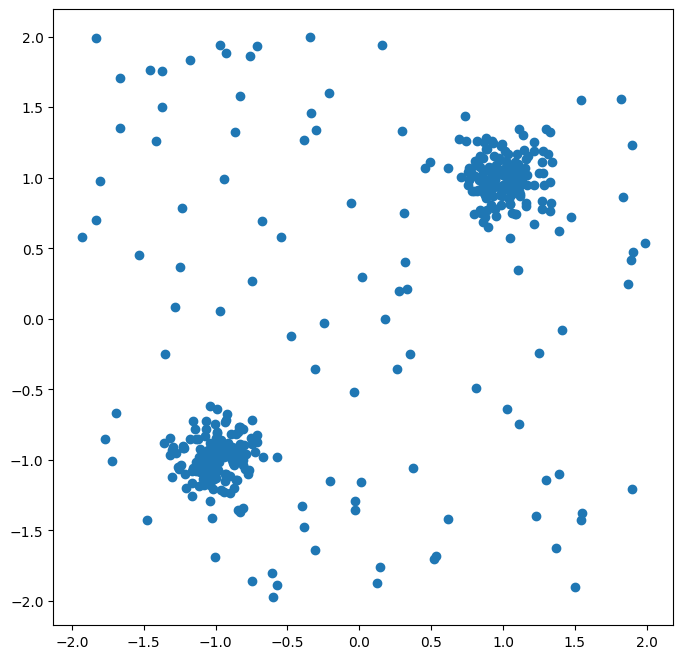

In [38]:
# ----- Normalizamos los datos para que tengan promedio 0 y desv. std. 1 -----
data = scale(data)
data = np.concatenate([data,
                       (np.random.rand(outliers, 2)-0.5)*4])

# ----- Graficamos -----
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

Definimos y entrenamos la SOM. Observar que, en esta aplicación, necesitamos un número pequeño de neuronas en el grid.

In [39]:
som_grid_rows = 2
som_grid_columns = 1

som = MiniSom(som_grid_rows, som_grid_columns, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)

som.train(data, 100, random_order=False, verbose=False)

/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


Una SOM crea un mapa de los datos de entrada en el espacio multidimensional al espacio menos dimensional que suele ser el espacio bidimensional llamado por el mapa de características de los datos. Para evaluar la calidad del mapa de características, se suelen utilizar dos indicadores: la calidad del aprendizaje y la calidad de la proyección. El indicador de calidad de aprendizaje se determina mediante la medición del **error de cuantificación** (QE). El indicador de calidad de proyección se determina mediante la medición del error topográfico (TE). Si los valores de QE y TE son pequeños, el mapa de características se considerará de buena calidad.

El QE es la diferencia entre el vector de entrada $X_j$ y el vector de pesos de su BMU $W_v$.

Definimos un umbral con base en el porcentaje de outliers que esperamos encontrar, en este caso, buscamos el percentil 70. `numpy.percentile` calcula el umbral de manera que el 70% de los errores de cuantificación queden por debajo del umbral.

In [40]:
quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)

error_treshold = np.percentile(quantization_errors,
                               100*(1-outliers_percentage)+5)

print('Error treshold:', error_treshold)

Error treshold: 0.34254594005079103


Graficamos el histograma de los errores y el umbral.

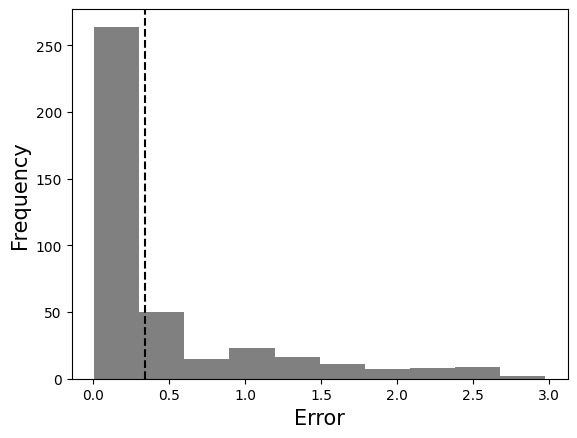

In [41]:
plt.figure()
plt.hist(quantization_errors, color='gray')
plt.axvline(error_treshold, color='black', linestyle='--')
plt.xlabel('Error', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

Definimos un arreglo con los valores de verdad de la comparación

$$\text{error_q}>\text{umbral}.$$

Es decir, este arreglo contiene evalua si cada dato es un *outlier*.

In [42]:
is_outlier = quantization_errors > error_treshold

print(quantization_errors[:5])
print(is_outlier[:5])

[0.16763476 0.30752088 0.22364363 0.05677474 0.27109566]
[False False False False False]


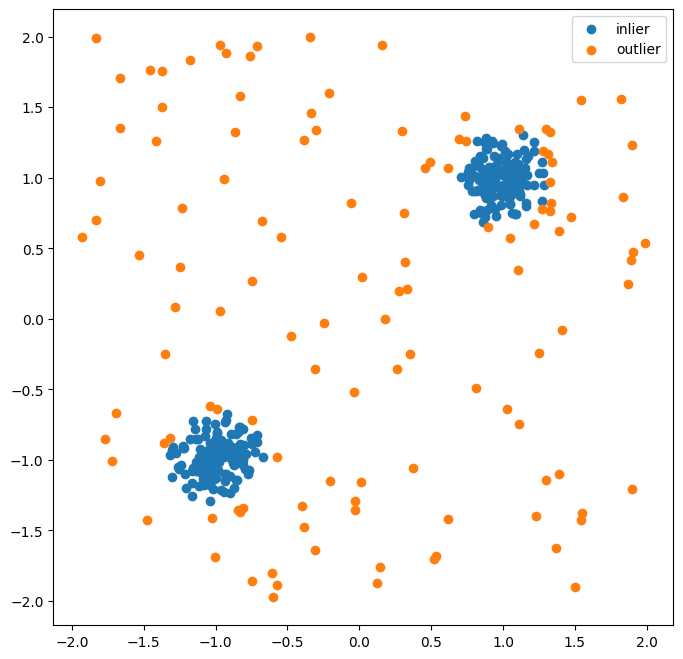

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')
plt.legend(loc='best')
plt.show()

En este ejemplo no nos interesa visualizar la representación 2-dimensional de los datos

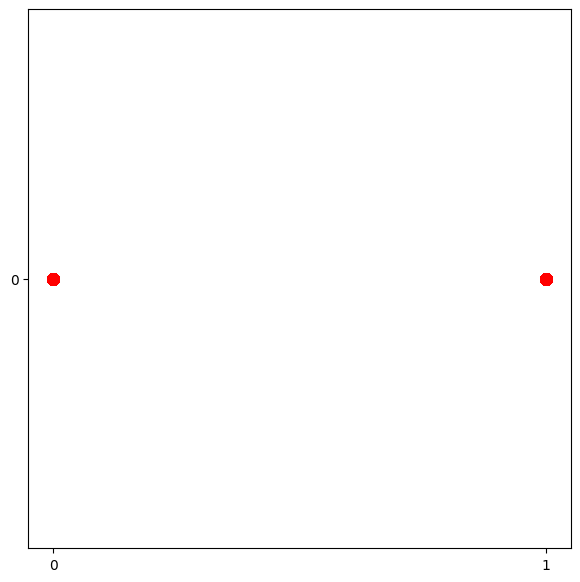

In [44]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,7))
for i, x in enumerate(data):
    w = som.winner(x)
    plt.scatter(w[0],
        w[1],
        marker = 'o',
        color = 'red',
        s = 50,
        linewidths = 2,
        alpha=0.5)
plt.xticks(range(som_grid_rows))
plt.yticks(list(range(som_grid_columns)))
plt.show()

# ⭕ Ejemplo 4: Segmentación

En el siguiente ejemplo usaremos el dataset de las portadas de las top 100 películas en www.imdb.com/chart/top al 13 de agosto de 2019. Todas son imágenes RGB de 278$\times$185.

El objetivo es hacer una cuadrícula de 10$\times$10 con las portadas de manera que imagenes cercanas queden cercanas, esto de acuerdo a los colores.

Cada imagen quedará representada por el arreglo aplanado de los 3 colores, será un vector de 154290 componentes.

El ejercicio consiste en definir y entrenar una red SOM con estos datos. Puedes escoger el número de iteraciones, el valor de sigma, la tasa de aprendizaje, etc. Prueba diferentes combinaciones de hiperparámetros buscando minimizar el QE.

Al final se mostrará el QE y se mostrará el arreglo de imágenes.

In [45]:
url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03-Deep-Learning/data/movie_covers.zip"
!wget --no-cache --backups=1 --progress="dot" {url}

--2023-07-13 22:19:50--  https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/03-Deep-Learning/data/movie_covers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1375052 (1.3M) [application/zip]
Failed to rename movie_covers.zip to movie_covers.zip.1: (2) No such file or directory
Saving to: ‘movie_covers.zip’

     0K .......... .......... .......... .......... ..........  3% 28.1M 0s
    50K .......... .......... .......... .......... ..........  7% 41.9M 0s
   100K .......... .......... .......... .......... .......... 11%  105M 0s
   150K .......... .......... .......... .......... .......... 14% 52.4M 0s
   200K .......... .......... .......... .......... .......... 18%  349M 0s
   250K .......... .......... .......... .......... .......... 22% 92.4M

In [47]:
from zipfile import ZipFile

archivo = "/content/movie_covers.zip"

print('Extrayendo contenido...')
with ZipFile(archivo, 'r') as Zip:
    Zip.extractall()
    print('Extracción finalizada.')

Extrayendo contenido...
Extracción finalizada.


Preparamos y escalamos los datos

In [ ]:
import numpy as np
import imageio
from glob import glob
from sklearn.preprocessing import StandardScaler

data = []
all_covers = glob('movie_covers/*.jpg')
for cover_jpg in all_covers:
    cover = imageio.imread(cover_jpg)
    data.append(cover.reshape(np.prod(cover.shape)))

original_shape = imageio.imread(all_covers[0]).shape

scaler = StandardScaler()
data = scaler.fit_transform(data)

print(f"Forma del dataset: {data.shape}")

Definir la red

In [50]:
from minisom import MiniSom

w = 10
h = 10

lr = 0.5
sigma = 3

num_features = data.shape[1]

som = MiniSom(h, w, num_features, learning_rate=lr,
              sigma=sigma, neighborhood_function='triangle')

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 139.72381998607037


Entrenar la red

In [ ]:
n_iter = 1000

som.train_random(data, n_iter, verbose=True)
win_map = som.win_map(data)

Mostramos el arreglo de imágenes

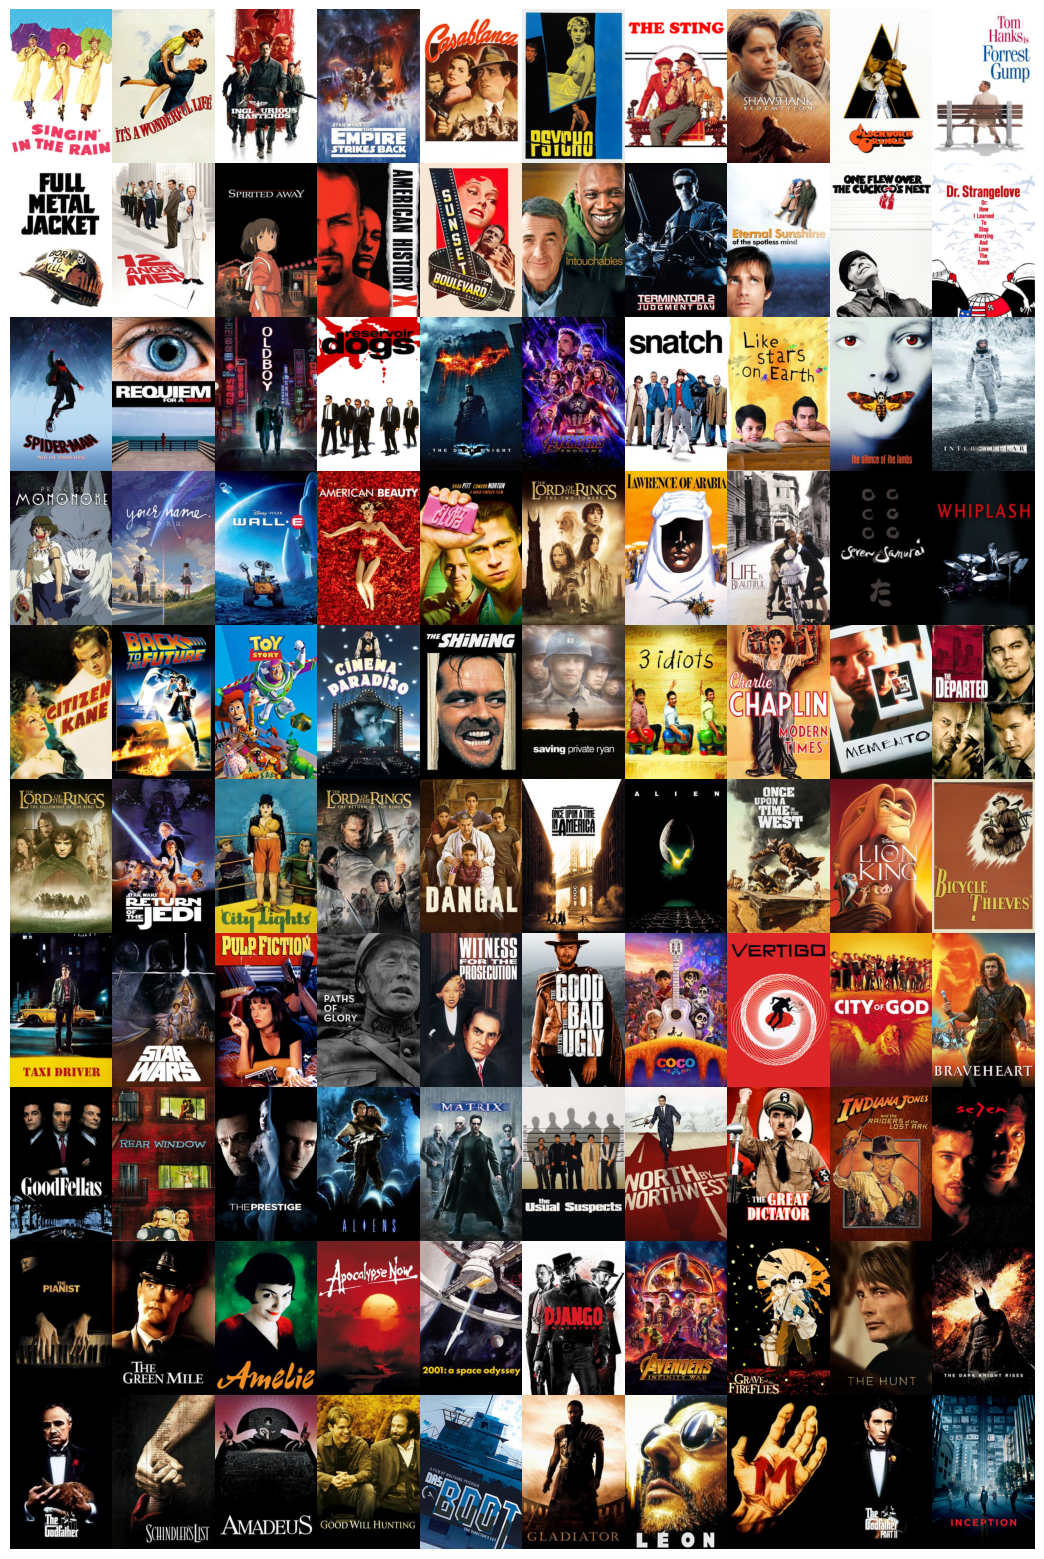

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

fig = plt.figure(figsize=(30, 20))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(h, w), axes_pad=0)

def place_image(i, img):
    img = (scaler.inverse_transform(img.reshape(1, -1))).astype(int)
    grid[i].imshow(img.reshape(original_shape))
    grid[i].axis('off')

to_fill = []
collided = []

for i in range(w*h):
    position = np.unravel_index(i, (h, w))
    if position in win_map:
        img = win_map[position][0]
        collided += win_map[position][1:]
        place_image(i, img)
    else:
        to_fill.append(i)

collided = collided[::-1]
for i in to_fill:
    position = np.unravel_index(i, (h, w))
    img = collided.pop()
    place_image(i, img)

plt.show()

# ⭕ Ejemplo 5: Clustering

Usaremos el dataset [seeds](https://archive.ics.uci.edu/dataset/236/seeds), el cual consta de 210 mediciones de 3 diferentes especies de trigo.

El objetivo del ejercicio es definir y entrenar una red SOM para hacer clustering en este dataset. Debemos encontrar 3 clusters.

* Prueba con diferentes combinaciones de hiperparámetros para la red.
* Prueba con diferentes combinaciones de features. Al final, prueba con las features 0 y 5.

Al final graficaremos los clusters junto con las instancias.

Preparamos los datos

In [22]:
from minisom import MiniSom
import numpy as np
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'],
                   sep='\t+', engine='python')

data

area  perimeter  compactness  length_kernel  width_kernel  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
205  12.19      13.20       0.8783          5.137         2.981   
206  11.23      12.88       0.8511          5.140         2.795   
207  13.20      13.66       0.8883          5.236         3.232   
208  11.84      13.21       0.8521          5.175         2.836   
209  12.30      13.34       0.8684          5.243         2.974   

     asymmetry_coefficient  length_kernel_groove  target  
0                    2.221                 5.220       1  
1                    1.018                 4.956       1  
2                    2.699                 4.825       1  
3                    2.259                 4.805       1  
4                    1.355                 5.175       1  
..                     ...                   ...     ...  
205                  3.631                 4.870       3  
206                  4.325                 5.003       3  
207                  8.315                 5.056       3  
208                  3.598                 5.044       3  
209                  5.637                 5.063       3  

[210 rows x 8 columns]

Probar con diferentes combinaciones de features

In [31]:
X = data.values[:,[0,5]]
y = data.values[:,-1]

Estandarizamos los datos

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Definimos la red

In [25]:
som_rows = 1
som_cols = 3

num_features = X.shape[1]

som = MiniSom(som_rows, som_cols, num_features, sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

Entrenamos la red

In [26]:
som.train_batch(X, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.846705446733947


Now we will consider all the sample mapped into a specific neuron as a cluster. To identify each cluster more easily we will translate the bidimensional indexes of the neurons on the SOM into a monodimentional indexes:

In [14]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T

som_shape = (som_rows,som_cols)

cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

Graficamos cada cluster de un color diferente.

* Las coordenadas de cada centroide son las primeras dos coordenadas de cada vector de pesos.
* Las coordenadas de cada punto del dataset son las primeras dos coordenadas de los datos de entrada.

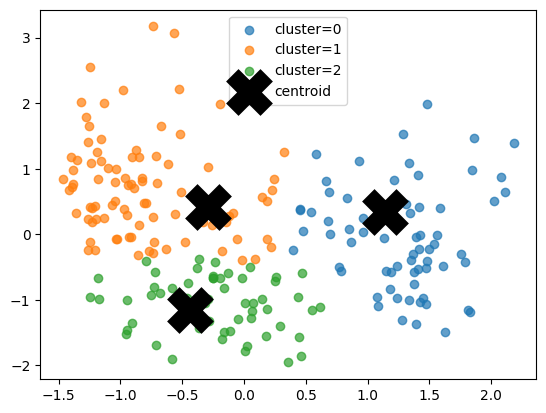

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# Datos
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=0.7)

# Centroides
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

Veamos cómo están los conteos de etiquetas en cada *cluster*

In [33]:
som.labels_map(X,y)

defaultdict(list,
            {(0, 2): Counter({1.0: 48, 2.0: 2, 3.0: 6}),
             (0, 1): Counter({1.0: 21, 2.0: 3, 3.0: 64}),
             (0, 0): Counter({1.0: 1, 2.0: 65})})